In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('dataset 2.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

data.head(3)


 	 The data frame has 569 rows and 33 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 n

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [54]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [55]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [56]:
features_mean= list(data.columns[1:11])

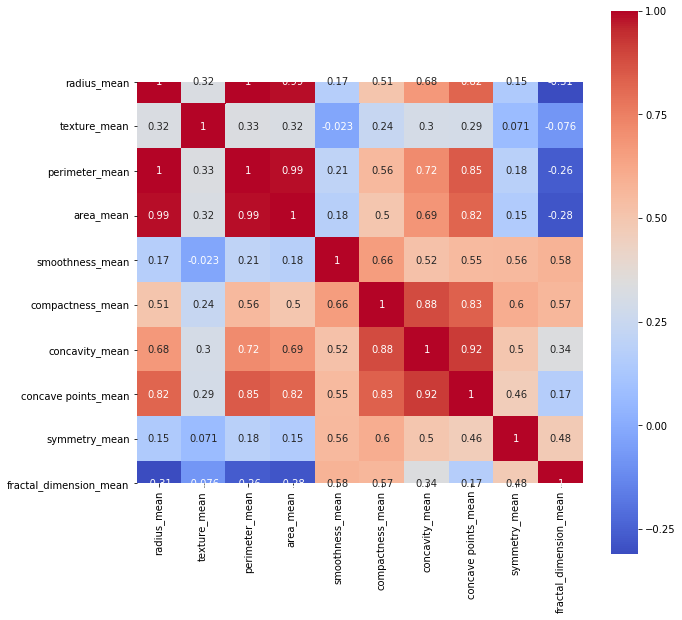

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

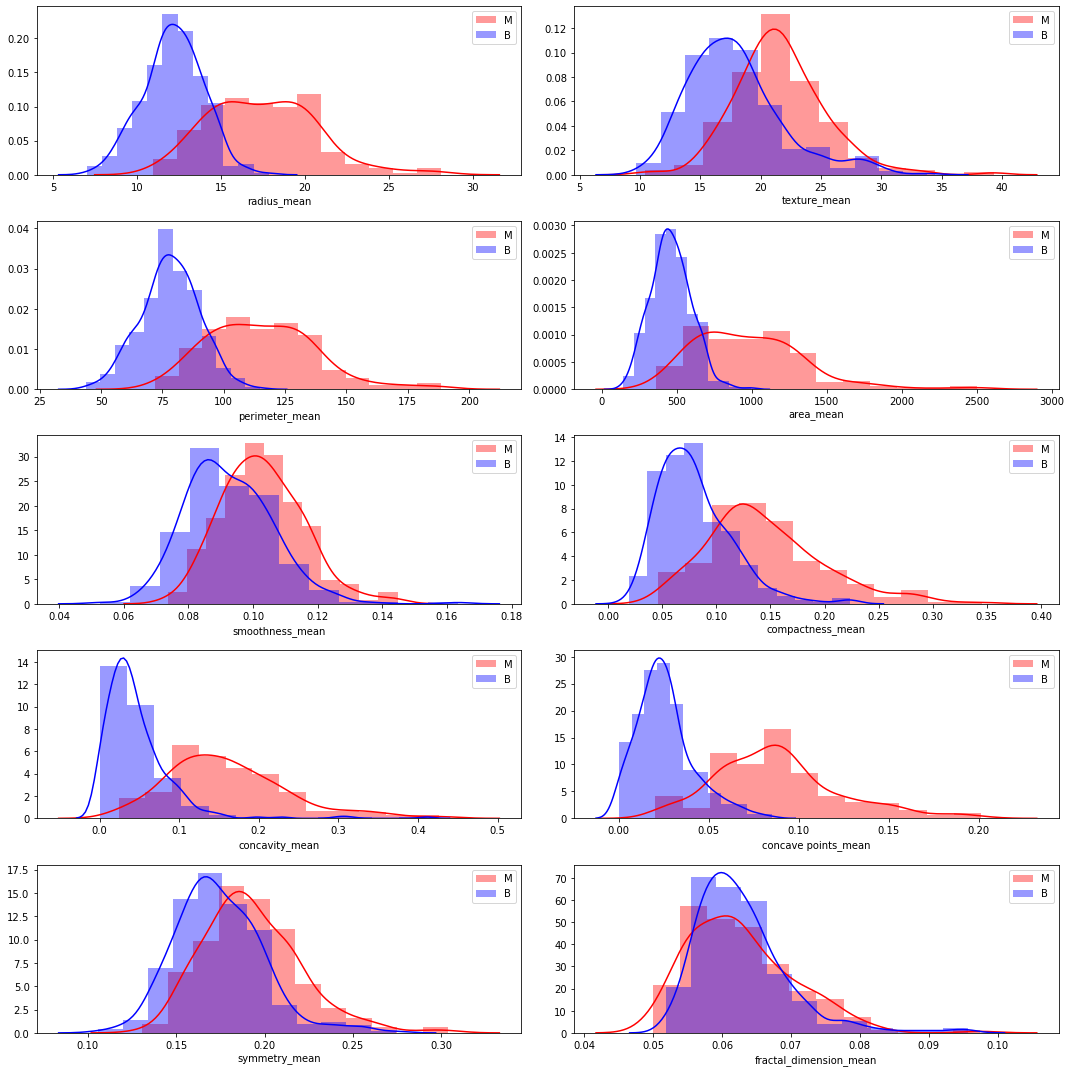

In [58]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [60]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [61]:
X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [62]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVC Accuracy: 69.30%
Cross validation score: 71.70% (+/- 4.07%)
Execution time: 0.10971 seconds 

NuSVC Accuracy: 69.30%
Cross validation score: 71.88% (+/- 3.97%)
Execution time: 0.10569 seconds 

LinearSVC Accuracy: 82.46%
Cross validation score: 65.13% (+/- 32.25%)
Execution time: 0.13863 seconds 



C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning

In [63]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



Accuracy: 93.86%
Cross validation score: 88.60% (+/- 6.96%)
Execution time: 0.039912 seconds 



In [64]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Accuracy: 94.74%
Cross validation score: 91.40% (+/- 5.03%)
Execution time: 0.021936 seconds 



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 95.61%
Cross validation score: 93.69% (+/- 4.25%)
Execution time: 0.073803 seconds 

Extra Trees Accuracy: 95.61%
Cross validation score: 93.17% (+/- 5.36%)
Execution time: 0.056854 seconds 

Dedicion Tree Accuracy: 92.11%
Cross validation score: 91.22% (+/- 5.27%)
Execution time: 0.02593 seconds 



C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 78.07%
Cross validation score: 77.55% (+/- 22.45%)
Execution time: 0.025975 seconds 



Remove this.

In [67]:
X = data.loc[:, 'radius_mean']
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [68]:
X = data.loc[:, 'area_mean']
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [69]:
X = data.loc[:, 'concavity_mean']
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [70]:
X = data.loc[:, 'concave points_mean']
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [71]:
X = data.loc[:, 'perimeter_mean']
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x=[i for i in X_train]
xarr=np.asarray(x)
xarr.reshape(-1,1)
accuracy_selection = []
cvs_selection = []

In [72]:
x_t=x=[i for i in X_test]
xarr_t=np.asarray(x_t)

In [73]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))


end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


SGD Classifier Accuracy: 42.11%
Execution time: 0.0019941 seconds 



In [74]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(xarr.reshape(-1,1), y_train)
prediciton = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SVC Accuracy: 89.47%
Execution time: 0.01097 seconds 

NuSVC Accuracy: 89.47%
Execution time: 0.012965 seconds 

LinearSVC Accuracy: 92.98%
Execution time: 0.019946 seconds 



C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Accuracy: 91.23%
Execution time: 0.0039883 seconds 



In [76]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Accuracy: 92.11%
Execution time: 0.00099277 seconds 



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(xarr.reshape(-1,1), y_train, y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(xarr.reshape(-1,1),y_train, y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))


print("Deicision Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Random Forest Accuracy: 83.33%
Execution time: 0.0089736 seconds 

Extra Trees Accuracy: 37.72%
Execution time: 0.0059834 seconds 

Deicision Tree Accuracy: 37.72%
Execution time: 0.0 seconds 



C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
diff_accuracy = list(np.array(accuracy_all))
diff_cvs = list(np.array(cvs_all))

d = {'accuracy_all':accuracy_all,  'diff_accuracy':diff_accuracy, 'cvs_all':cvs_all, 'diff_cvs':diff_cvs,}

index = ['SGD', 'SVC', 'NuSVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree']

df = pd.DataFrame(d, index=index)

In [80]:
from sklearn.model_selection import GridSearchCV

X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
csv_all = []

In [81]:
start = time.time()

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))


print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: {0:.5} seconds \n".format(end-start))

print("Best parameters: {0}".format(clf.best_params_))

Accuracy: 37.72%
Execution time: 0.037868 seconds 

Best parameters: {'priors': [0.01, 0.99]}


C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [82]:
start = time.time()

parameters = {'n_estimators':list(range(1,101)), 'criterion':['gini', 'entropy']}

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))


print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

clf = GridSearchCV(ExtraTreesClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))


print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(xarr.reshape(-1,1), y_train)
prediction = clf.predict(xarr_t.reshape(-1,1))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))


print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Random Forest Accuracy: 81.58%
Execution time: 4.7374 seconds 

Best parameters: {'criterion': 'gini', 'n_estimators': 67} 

Extra Trees Accuracy: 80.70%
Execution time: 4.4481 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 35} 

Dedicion Tree Accuracy: 81.58%
Execution time: 0.023936 seconds 

Best parameters: {'criterion': 'gini', 'splitter': 'random'} 



C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SIDD\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
